# Data Encoding

In [1]:
#import the required libraries
import pandas as pd
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data from csv file
data=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
# Analyse the Data
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [6]:
#Use Binary encodings to convert the Gender to 0 or 1
data['Male'] = data['Gender'].map( {'M':1, 'F':0} )

In [7]:
data['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [8]:
from sklearn.preprocessing import LabelEncoder
data['City_encoded'] = LabelEncoder().fit_transform(data['Neighbourhood'])

In [9]:
data['City_encoded']

0         39
1         39
2         45
3         54
4         39
5         58
6         25
7         25
8          1
9         12
10        50
11        50
12        50
13        50
14        50
15        50
16        50
17        12
18        50
19        15
20        50
21        12
22        12
23        12
24        78
25        12
26         6
27        12
28        77
29        66
          ..
110497    43
110498    43
110499    43
110500    43
110501    43
110502    25
110503    73
110504    43
110505    43
110506    43
110507    43
110508    43
110509    43
110510    73
110511    43
110512    43
110513     2
110514    43
110515    43
110516    43
110517    43
110518    43
110519    43
110520    43
110521    43
110522    43
110523    43
110524    43
110525    43
110526    43
Name: City_encoded, Length: 110527, dtype: int32

In [10]:
data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
#Use Binary encodings to convert the No-Shows
data['Target'] = data['No-show'].map( {'Yes':1, 'No':0} )

In [12]:
#Visualise the data co-relation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

C:\Users\Sethu\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


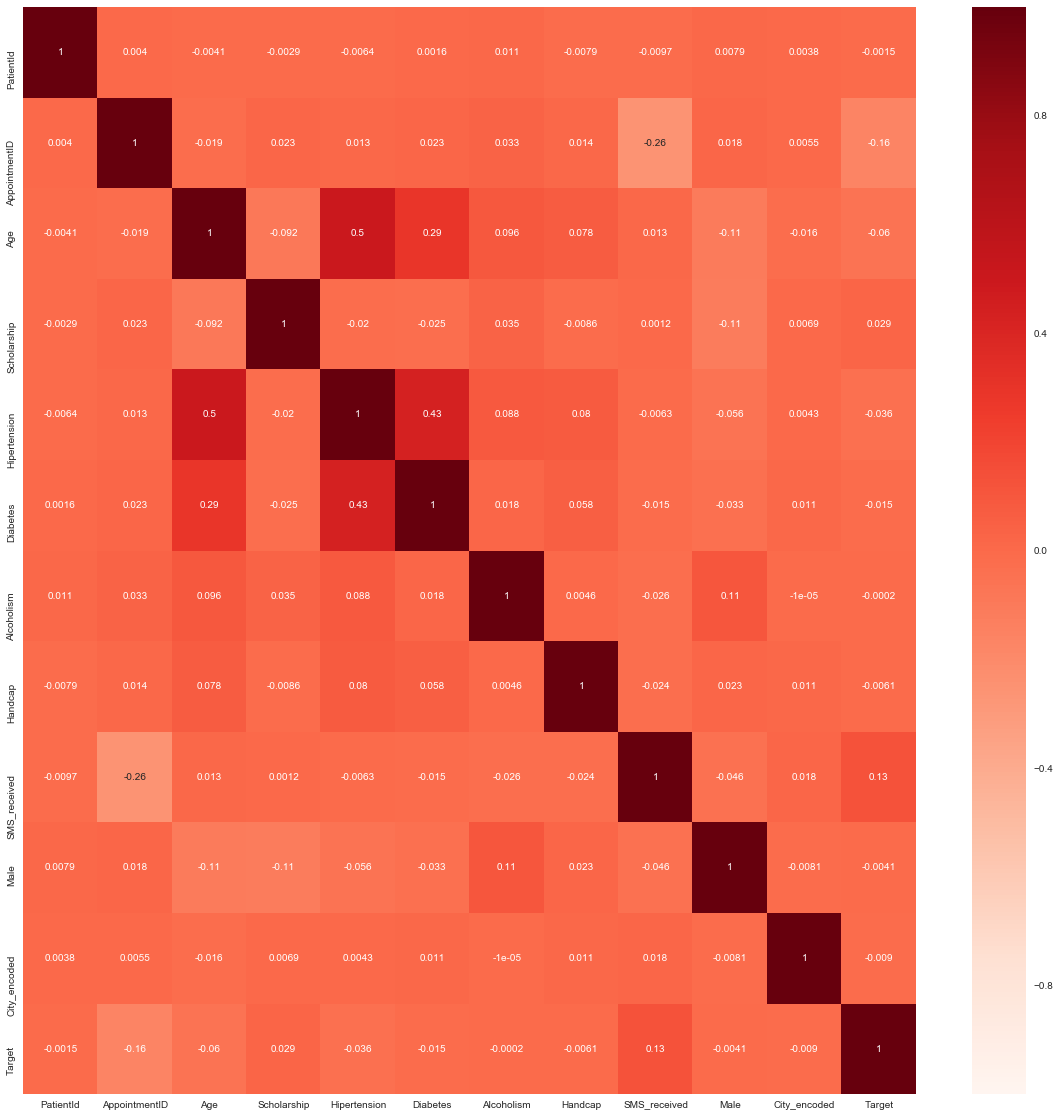

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
# This indicates that for Target the features - SMS-Received and Scholarship are in positively co-related

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [16]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Male',
       'City_encoded', 'Target'],
      dtype='object')

In [17]:
input_features =['SMS_received','Age','Male','City_encoded']

In [18]:
X=data[input_features]
y=data['Target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [54]:
# Spot Check Algorithms accuracy with StratifiedKfolds
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.796673 (0.000031)
LDA: 0.796673 (0.000031)
KNN: 0.766389 (0.003675)
CART: 0.767979 (0.002618)
NB: 0.796673 (0.000031)


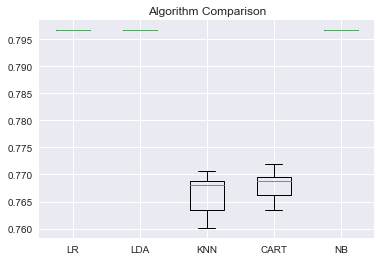

In [63]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [56]:
resultsDF

,0,1,2,3,4,5,6,7,8,9
0,0.796588,0.796691,0.796691,0.796691,0.796691,0.796691,0.796691,0.796665,0.796665,0.796665
1,0.796588,0.796691,0.796691,0.796691,0.796691,0.796691,0.796691,0.796665,0.796665,0.796665
2,0.768803,0.762828,0.770712,0.765154,0.761018,0.767739,0.760114,0.770553,0.768226,0.768744
3,0.769191,0.769678,0.772005,0.763474,0.766188,0.770841,0.764637,0.769261,0.768356,0.766158
4,0.796588,0.796691,0.796691,0.796691,0.796691,0.796691,0.796691,0.796665,0.796665,0.796665
